In [1]:
locations_imeis = '864502030077986, 864502030078174, 864502030219042, 864502035715572, 864502035760115, 864502035977289, 864502035977578, 864502036022572, 864502036023307, 864502036023398, 864502037722832'.split(", ")

In [2]:
locations_imeis

['864502030077986',
 '864502030078174',
 '864502030219042',
 '864502035715572',
 '864502035760115',
 '864502035977289',
 '864502035977578',
 '864502036022572',
 '864502036023307',
 '864502036023398',
 '864502037722832']

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
dfs = {}
for imei in locations_imeis[:]:
    try:
        #print(imei)
        u = 'http://api.urbansciences.in/avgNTs/1/imei/{}/type/csv/start/20180224000000/end/20180228120000/ApiKey/sgLztY2xGJ'.format(imei)
        print(u)
        df = pd.read_csv(u)
        dfs[imei] = df
    except:
        print(imei)

http://api.urbansciences.in/avgNTs/1/imei/864502030077986/type/csv/start/20180224000000/end/20180228120000/ApiKey/sgLztY2xGJ
http://api.urbansciences.in/avgNTs/1/imei/864502030078174/type/csv/start/20180224000000/end/20180228120000/ApiKey/sgLztY2xGJ
http://api.urbansciences.in/avgNTs/1/imei/864502030219042/type/csv/start/20180224000000/end/20180228120000/ApiKey/sgLztY2xGJ
http://api.urbansciences.in/avgNTs/1/imei/864502035715572/type/csv/start/20180224000000/end/20180228120000/ApiKey/sgLztY2xGJ
http://api.urbansciences.in/avgNTs/1/imei/864502035760115/type/csv/start/20180224000000/end/20180228120000/ApiKey/sgLztY2xGJ
http://api.urbansciences.in/avgNTs/1/imei/864502035977289/type/csv/start/20180224000000/end/20180228120000/ApiKey/sgLztY2xGJ
http://api.urbansciences.in/avgNTs/1/imei/864502035977578/type/csv/start/20180224000000/end/20180228120000/ApiKey/sgLztY2xGJ
http://api.urbansciences.in/avgNTs/1/imei/864502036022572/type/csv/start/20180224000000/end/20180228120000/ApiKey/sgLztY2xGJ


In [61]:
dfs[imei][' latitude'].values[0], dfs[imei][' longitude'].values[0]

(24.1889, 83.143500000000003)

In [24]:
from mpl_toolkits.basemap import Basemap

/Users/nipun/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nipun/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/nipun/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nipun/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


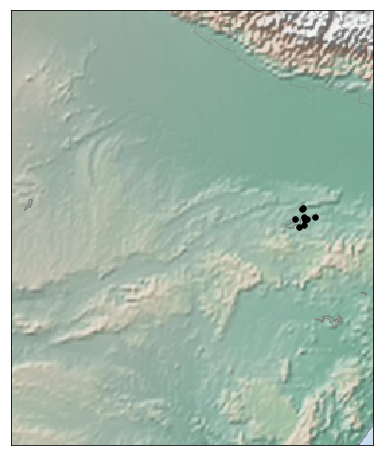

In [64]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=24, lon_0=80,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

lats = []
lons= []
vals = []
for x in locations_imeis:
    temp = dfs[x][' latitude'].dropna().mean()
    if temp:
        lats.append(temp)
        lons.append(dfs[x][' longitude'].dropna().mean())
        vals.append(dfs[x]['aqi'].mean())
x, y = m(lons,lats)


#m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(x,y,30,marker='o',color='k',zorder=10)

AttributeError: there are no boundary datasets associated with this Basemap instance

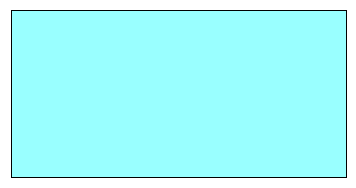

In [45]:
[dfs[imei][' latitude'].values[0] for imei in locations_imeis]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [48]:
[dfs[x][' latitude'].values[0] for x in locations_imeis]

IndexError: index 0 is out of bounds for axis 0 with size 0

864502030077986 24.046000000000017
864502030078174 24.16789999999996
864502030219042 nan
864502035715572 nan
864502035760115 24.237100000000012
864502035977289 24.22760000000001
864502035977578 24.4742
864502036022572 24.19619999999999
864502036023307 24.44720000000003
864502036023398 24.00379999999997
864502037722832 24.188900000000054


In [67]:
lats = []
lons= []
vals = []
for x in locations_imeis:
    temp = dfs[x][' latitude'].dropna().mean()
    if temp:
        lats.append(temp)
        lons.append(dfs[x][' longitude'].dropna().mean())
        vals.append(dfs[x]['aqi'].dropna().mean())

In [68]:
vals

[60.270270270270274,
 99.0204081632653,
 nan,
 nan,
 48.755102040816325,
 171.27551020408163,
 330.0,
 188.19565217391303,
 113.96,
 75.6043956043956,
 123.05102040816327]

In [69]:
is np.i

24.188900000000054